## CNN 卷積神經網路

* 影像的特徵提取: 透過 Convolution 與 Max Pooling 提取影像特徵.
* Fully connected Feedforward network: Flatten layers, hidden layers and output layers

http://puremonkey2010.blogspot.com/2017/07/toolkit-keras-mnist-cnn.html

## STEP1. 資料讀取與轉換 

In [22]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np  
np.random.seed(10)  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32') 

## STEP2. 將 Features 進行標準化與 Label 的 Onehot encoding 

In [23]:
# Standardize feature data  
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)  
y_TestOneHot = np_utils.to_categorical(y_Test) 

## STEP3. 建立卷積層與池化層

In [24]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))


## STEP4. 建立神經網路 

In [25]:
# Add Dropout layer  
model.add(Dropout(0.25))  
model.add(Flatten())  
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))  
model.summary()  
print("")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               225920    
__________

## STEP5. 定義訓練並進行訓練 

In [26]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint 
import os
from datetime import datetime
from tensorflow import keras

# 定義訓練方式 
path='/home/mnist/model11'
if not os.path.isdir(path):
 os.mkdir(path)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
logdir = path
logdir = logdir + "/logs/scalars/" 
logdir = logdir + datetime.now().strftime("%Y%m%d-%H%M%S")

#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
filepath=path

filepath = filepath+"/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
#mode='max')
#callbacks_list = [checkpoint]
callbacks_list =[ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max'),keras.callbacks.TensorBoard(log_dir=logdir,write_graph=False)]
                                  
                 


#train_history = model.fit(x=X_Train4D_norm,y=y_TrainOneHot, validation_split=0.2,epochs=10, batch_size=300, callbacks=callbacks_list,verbose=1) 
train_history = model.fit(x=X_Train4D_norm,y=y_TrainOneHot,epochs=15, batch_size=300,verbose=0,validation_data=(X_Test4D_norm, y_TestOneHot),callbacks=callbacks_list) 
# 開始訓練  
  
model.save( path+'/model.h5')


Epoch 00001: val_acc improved from -inf to 0.97500, saving model to /home/mnist/model11/weights-improvement-01-0.98.hdf5

Epoch 00002: val_acc improved from 0.97500 to 0.98350, saving model to /home/mnist/model11/weights-improvement-02-0.98.hdf5

Epoch 00003: val_acc improved from 0.98350 to 0.98670, saving model to /home/mnist/model11/weights-improvement-03-0.99.hdf5

Epoch 00004: val_acc improved from 0.98670 to 0.98810, saving model to /home/mnist/model11/weights-improvement-04-0.99.hdf5

Epoch 00005: val_acc improved from 0.98810 to 0.98900, saving model to /home/mnist/model11/weights-improvement-05-0.99.hdf5

Epoch 00006: val_acc improved from 0.98900 to 0.98950, saving model to /home/mnist/model11/weights-improvement-06-0.99.hdf5

Epoch 00007: val_acc improved from 0.98950 to 0.99170, saving model to /home/mnist/model11/weights-improvement-07-0.99.hdf5

Epoch 00008: val_acc improved from 0.99170 to 0.99220, saving model to /home/mnist/model11/weights-improvement-08-0.99.hdf5

Ep

## STEP6. 畫出 accuracy 執行結果 

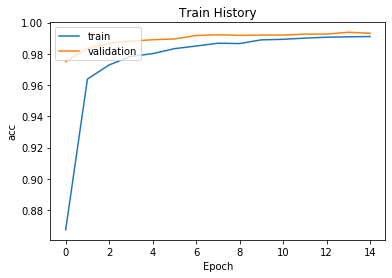

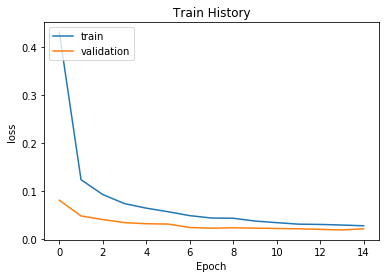

10000/10000 [==============================] - 1s 86us/step

	[Info] Accuracy of testing data = 99.3%
	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[4 1 9 5 7 7 2 8 2 0]

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8     9
label                                                         
0        977     0     0     0    0    0    1     1    1     0
1          0  1132     2     0    0    0    0     1    0     0
2          1     0  1028     0    1    0    0     2    0     0
3          0     0     0  1009    0    1    0     0    0     0
4          0     0     0     0  972    0    1     0    2     7
5          0     0     0     8    0  882    1     0    0     1
6          3     3     0     0    1    2  949     0    0     0
7          0     3     3     1    0    0    0  1015    1     5
8          2     0     1     1    1    1    1     1  965     1
9          0     0     0     1    2    2    0     0    2  

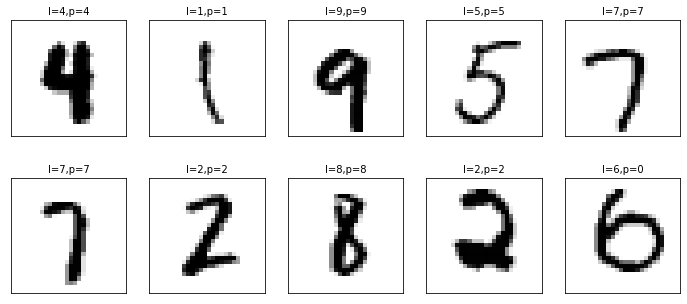

In [27]:
import matplotlib.pyplot as plt  
import tensorflow as tf

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
plt.show()  

show_train_history(train_history, 'acc', 'val_acc')  
show_train_history(train_history, 'loss', 'val_loss') 

scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))   

print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[250:260]))
plot_images_labels_predict(X_Test, y_Test, prediction, idx=250)  
import pandas as pd
print("\t[Info] Display Confusion Matrix:")
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))

## STEP7. 匯出模型

In [22]:
model.save_weights('/tmp/CNN_Mnist.h5')

## STEP8. 讀取模型

In [23]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D 

model.load_weights('/tmp/CNN_Mnist.h5')

## STEP9. 測試模型

10000/10000 [==============================] - 1s 83us/step

	[Info] Accuracy of testing data = 99.3%
	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[4 1 9 5 7 7 2 8 2 0]

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8     9
label                                                         
0        977     0     0     0    0    0    1     0    1     1
1          0  1132     1     1    0    0    0     1    0     0
2          1     1  1027     1    0    0    0     2    0     0
3          0     0     0  1009    0    1    0     0    0     0
4          0     0     0     0  973    0    0     0    2     7
5          0     0     0     6    0  884    1     0    0     1
6          3     2     0     0    1    3  949     0    0     0
7          0     3     3     1    0    0    0  1016    1     4
8          2     0     2     2    0    1    1     2  960     4
9          0     0     0     1    2    3    0     0    2  

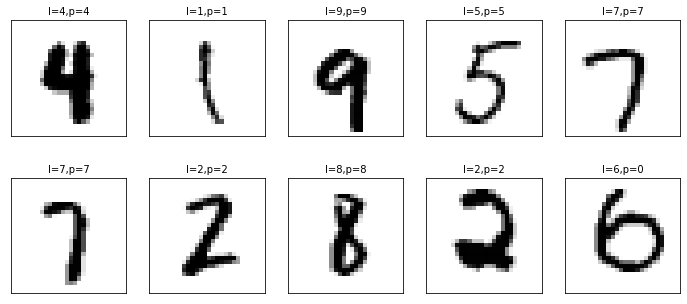

In [24]:
import matplotlib.pyplot as plt  
import tensorflow as tf

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
plt.show()  

scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))   

print("\t[Info] Making prediction of X_Test4D_norm")  
prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[250:260]))
plot_images_labels_predict(X_Test, y_Test, prediction, idx=250)  
import pandas as pd
print("\t[Info] Display Confusion Matrix:")
print("%s\n" % pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict']))